In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Deutch Jouzsa Algorithm:

In [2]:
bitstring = "10101100"

In [3]:
n = len(bitstring)

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [5]:
q = QuantumRegister(n+1)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

Apply x gate to create |y> element for the initial quantum state. 

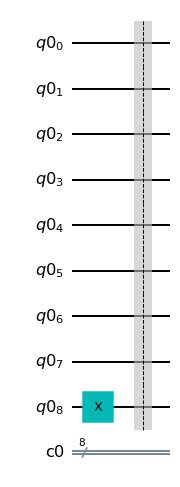

In [6]:
qc.x(q[n])
qc.barrier()
qc.draw("mpl")

Apply Hadamard gate in all the qubits.

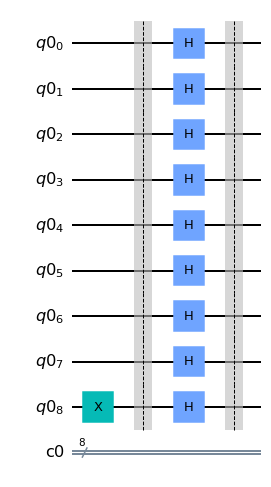

In [7]:
for i in range(n+1):
  qc.h(q[i])
qc.barrier()
qc.draw("mpl")

Create the funciton mapping depending on whether the funciton is balanced or inbalanced. 

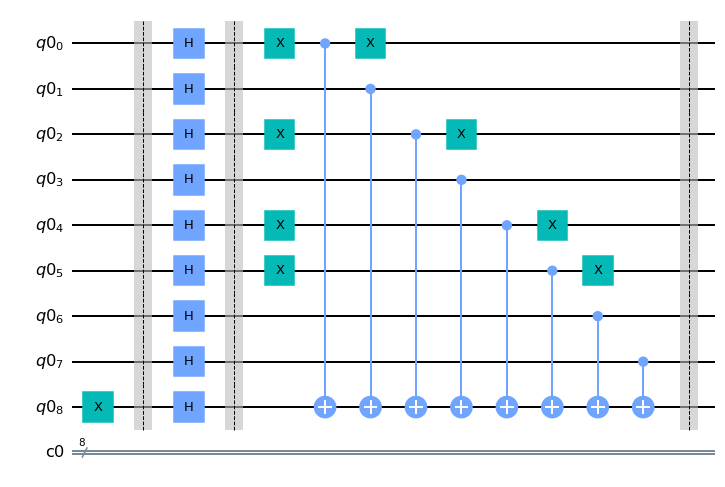

In [8]:
function = "balanced"
if function == "balanced":
  for i in range(n):
    if bitstring[i] == "1":
      qc.x(q[i])
    qc.cx(q[i],q[n])
    if bitstring[i] == "1":
      qc.x(q[i])
elif function == "constant":
  qc.i(q[n])
qc.barrier()
qc.draw("mpl")

apply another hadamard gate in all the qubits.

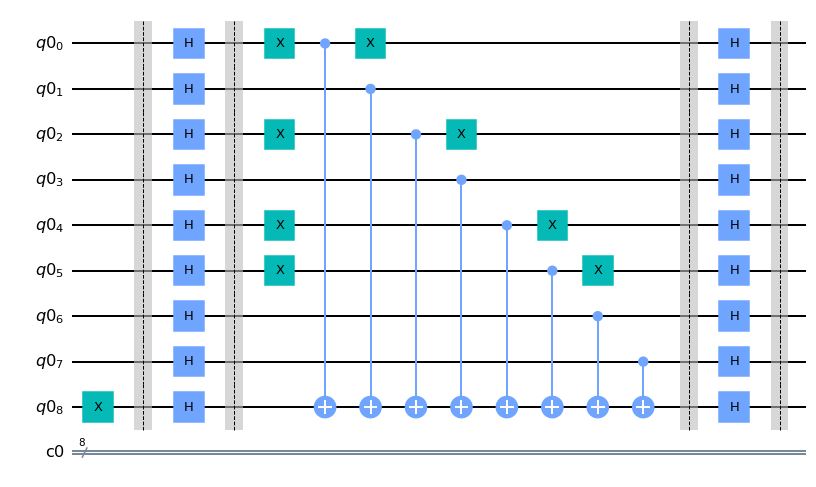

In [9]:
for i in range(n+1):
  qc.h(q[i])
qc.barrier()
qc.draw("mpl")

measure all the qubits except the last one.

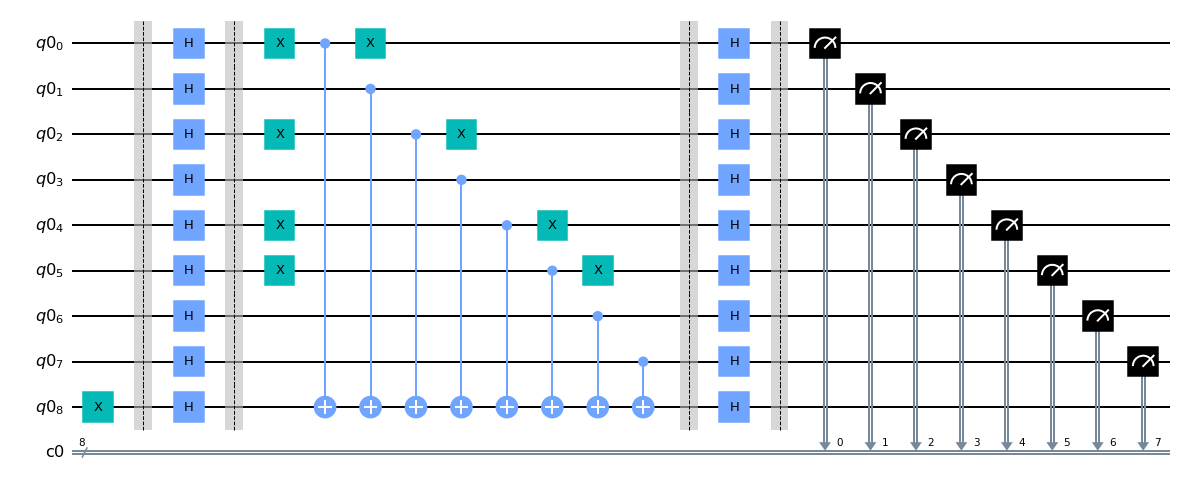

In [10]:
for i in range(n):
  qc.measure(q[i],c[i])
qc.draw("mpl")

In [11]:
# simulate in an ideal quantum computer
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'11111111': 1024}


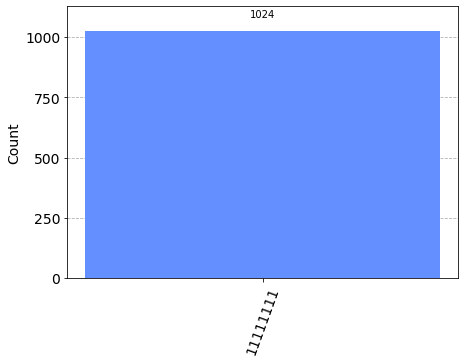

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [13]:
# simulate on a "real quantum computer
from qiskit.providers.fake_provider import FakeGuadalupe
from qiskit.visualization import plot_error_map

In [14]:
device_simulation = FakeGuadalupe()

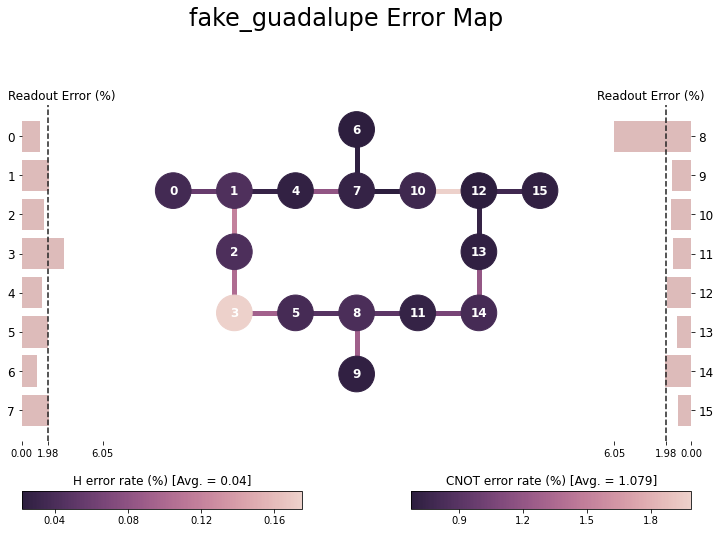

In [15]:
plot_error_map(device_simulation)

In [16]:
qc2 = transpile(qc,device_simulation)

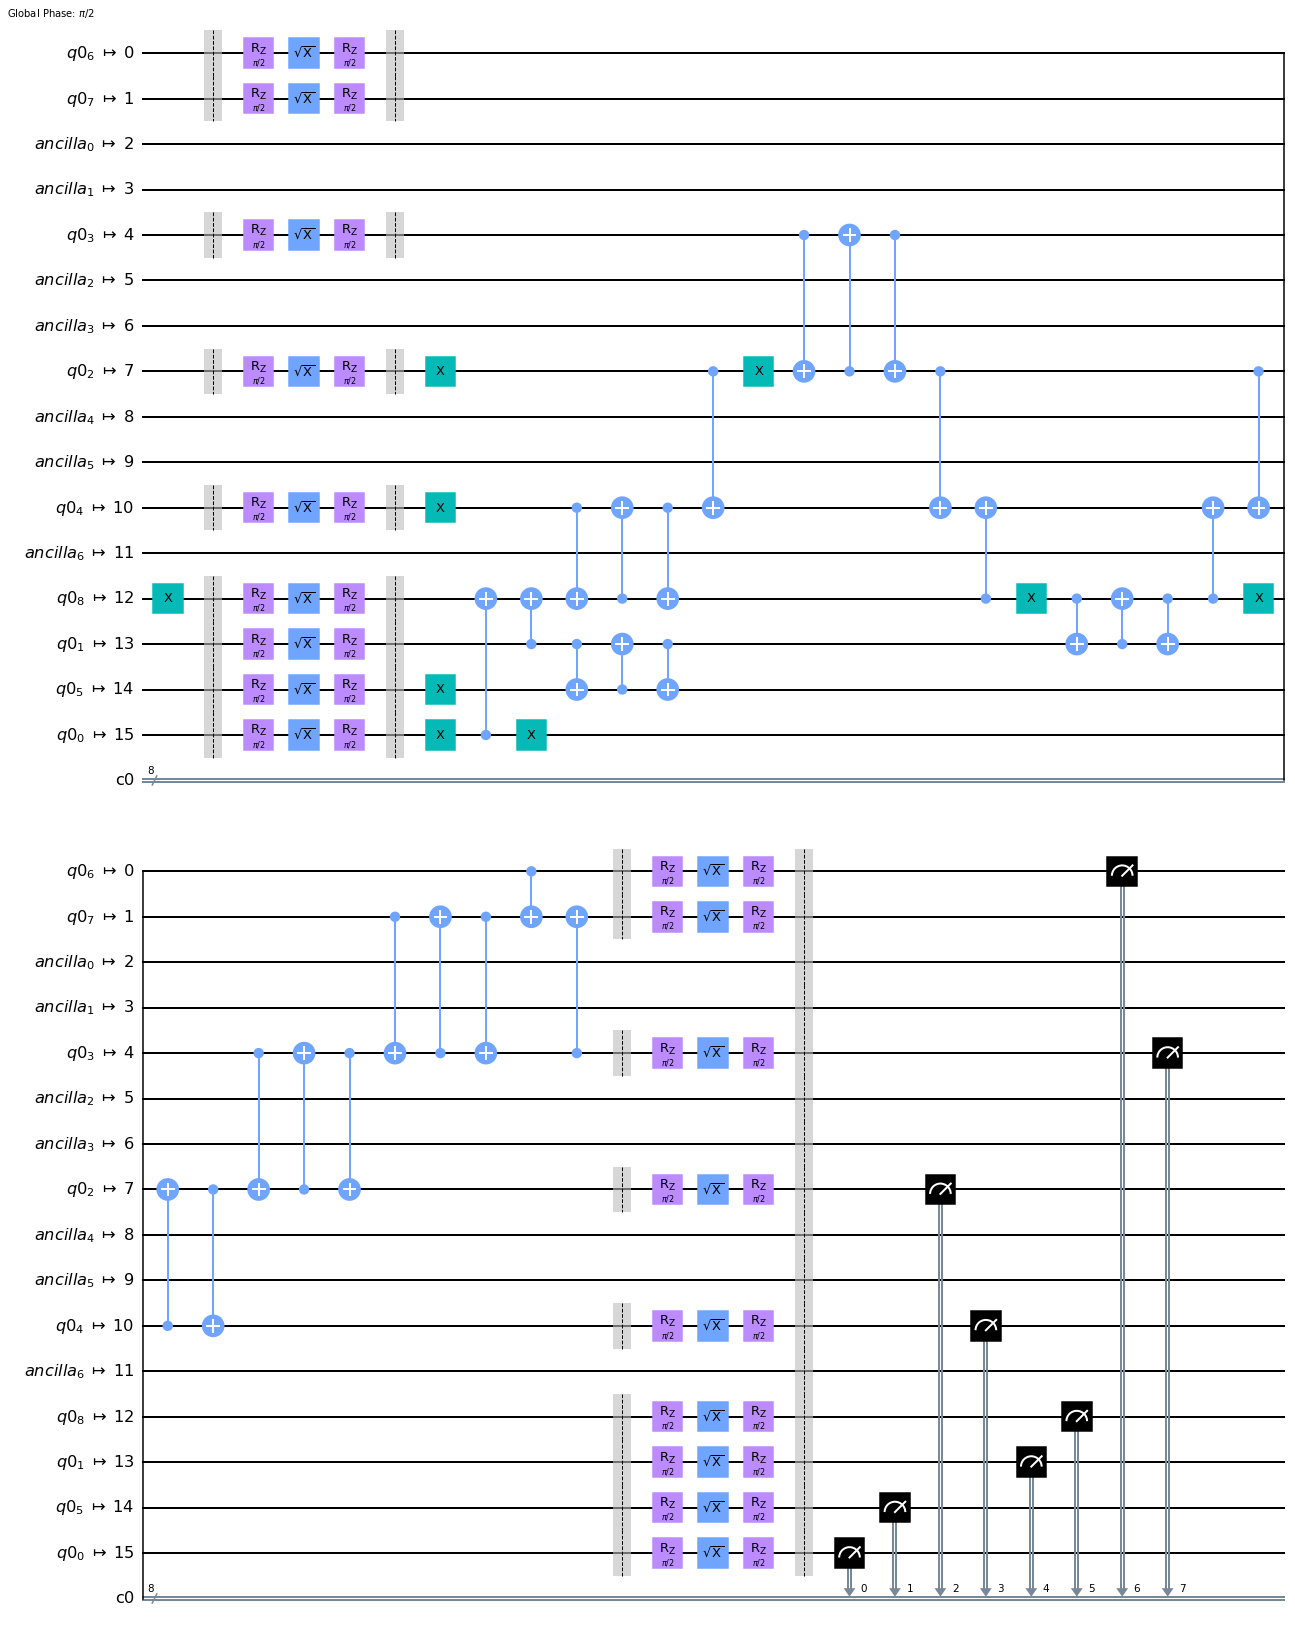

In [17]:
qc2.draw("mpl")

In [18]:
job = device_simulation.run(qc2,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'11101110': 1, '01111011': 2, '11110010': 1, '11010011': 1, '11001011': 3, '11100111': 1, '01111101': 1, '00101111': 2, '01011101': 2, '11011011': 2, '11100011': 1, '10011111': 1, '00011001': 1, '11110001': 1, '00111101': 2, '11001110': 1, '10111101': 3, '00001111': 3, '11111011': 28, '11101111': 33, '10111110': 1, '00010011': 19, '00110111': 4, '00111011': 12, '01101111': 1, '01111110': 1, '11101101': 1, '00101011': 1, '00000000': 1, '01111111': 23, '01110011': 2, '00111111': 32, '00000111': 3, '11011111': 32, '11111110': 8, '11001101': 2, '10111011': 2, '11111111': 619, '11110111': 24, '00000011': 18, '00011101': 1, '11011101': 12, '11111101': 42, '11001111': 11, '11110101': 1, '00001011': 3, '11100100': 1, '00110101': 1, '11111001': 2, '00110010': 1, '11110011': 10, '00011111': 12, '01011111': 1, '10101111': 2, '11011110': 1, '00010111': 2, '10111111': 18, '11101011': 1, '00000001': 5, '00001110': 1}


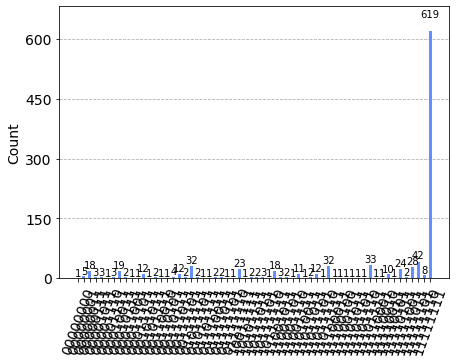

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)